## Baseball Case Study

### Data description

The data has 16 quantitative input variables, and 1 quantitative output variable, and 30 instances (observations).

### Objective

Predicting Number of Wins(W) using Machine Learning

### Importing the libraries

In [1]:
# Numerical libraries
import numpy as np  
# to handle data in form of rows and columns 
import pandas as pd    
# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
from matplotlib import pyplot
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
#styling figures
plt.style.use('classic')
plt.rc('font',size=14)

#importing seaborn for statistical plots
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
# Import StandardScaler library
from sklearn.preprocessing import StandardScaler
# Import TrainTest Split
from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score

### Importing the datset

In [2]:
# reading the CSV file into pandas dataframe
df=pd.read_csv(r'C:\Users\Dell\Documents\baseball_data.csv')  

In [3]:
# Read first 5 observations of the dataset
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


- DESCRIBING THE COLUMNS
- W – Win: a win-loss record indicates number of wins and losses credited to a pitcher.
- R – Runs scored: number of times a player crosses home plate
- AB – At bat: when a batter reaches base via fielder's choice, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
- H – Hit: reaching base because of a batted, fair ball without error by the defense
- 2B – Double: A batter is credited with a double when he hits the ball into play and reaches second base without the help of intervening error
- 3B - Triple: A triple occurs when a batter hits the ball into play and reaches third base without the help of intervening error
- HR - Home run: It occurs when a batter hits a fair ball and scores on the play without being put out.
- BB - Base on Balls: It occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by filter
- SO - Strikeouts: number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base.
- SB - Stolen Bases: when the runner advances one base unaided by a hit,a putout, an error, a fielder's choice.
- RA - Runs allowed: measures the rate at which runs are allowed or scored.
- ER - Earned runs: number of runs that did not occur as a result of errors or passed balls
- ERA - Earned Run Average: total number of earned runs, multiplied by 9, divided by innings pitched
- CG - Complete Games: number of games where player was the only pitcher for their team
- SHO - Shoutouts: number of complete games pitched with no runs allowed
- SV - Saves:number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
- E - Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

In [4]:
df.shape

(30, 17)

Checking for duplicates

In [5]:
duplicate=df[df.duplicated()]
print('Duplicate Rows:')
duplicate

Duplicate Rows:


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


- From above, we find that there are no duplicate values in the data.

### Univariate Analysis

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

- All the data types are of int and float. Here target variable is continuous values, then problem statement is a regression problem statement

### Description of the attributes

In [7]:
#Analyze the distribution of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


- It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the columns of the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


- No need to change the data type they are apprpriate so we can skip the step of data conversion.

#### Missing values

In [9]:
# Missing values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

- There are no missing values in the given baseball dataset

#### Analysis of the body of distributions 

- Lst's visualize the distribution of continuous features

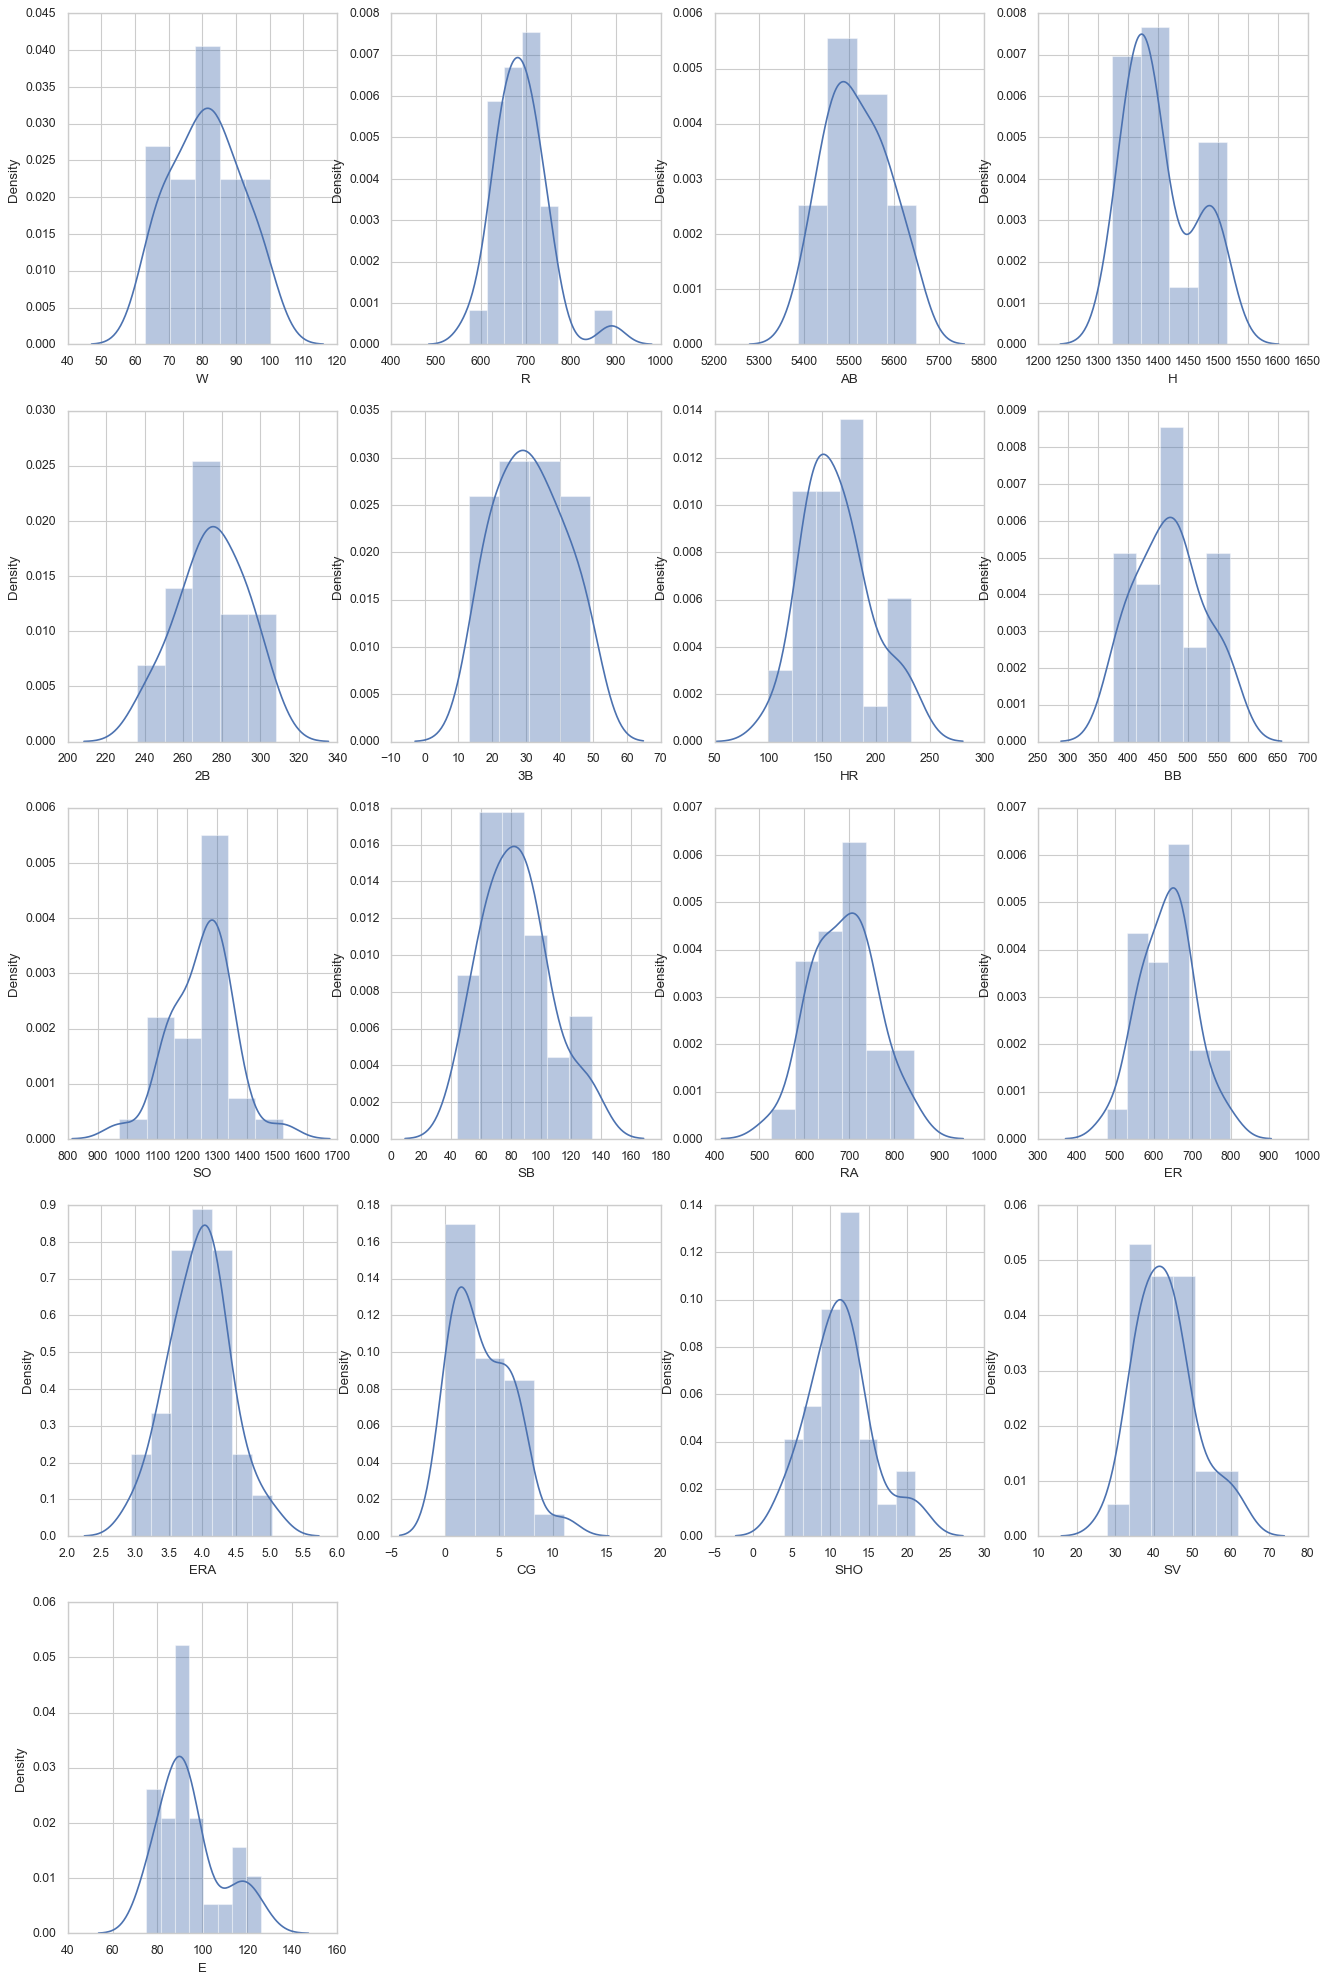

In [10]:
plt.figure(figsize= (20,30))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in df.columns:   # for-loop to iterate over every attribute whose outliers is to be visualized
    plt.subplot(5, 4, pos)   # plot grid
    sns.distplot(df[feature], kde= True ) #plotting distribution plot     
    pos += 1  # to plot over the grid one by one  

- 'W' has a fairly smooth ascension from min to max and the distribution is almost normal
- 'R' has mixture of gaussians and distribution is slightly positively skewed
- 'AB' has a fairly smooth ascension from min to max and the distribution is almost normal
- 'H' has mixture of 2 gaussian distributions
- '2B' has fairly ascension from min to max and the distribution looks like normal
- '3B' has fairly smooth ascension from min to max and the distribution is almost normal
- 'HR' has data that is right skewed
- 'BB' has fairly ascension from min to max and the distribution looks like normal
- 'SO' has the data that is left-skewed
- 'SB' has a fairly smooth ascension from min to max and the distribution is almost normal
- 'RA' has data which is normally distributed
- 'ER' has ascension from min to max and the distribution is almost normal
- 'ERA' has a fairly smooth ascension from min to max and the distribution is almost normal
- 'CG' has mixture of gaussians and distribution is slightly positively skewed
- 'SHO' has the data that is right-skewed
- 'SV' has fairly ascension from min to max and the distribution looks like normal
- 'E' has 2 gaussians and distribution is positively right skewed

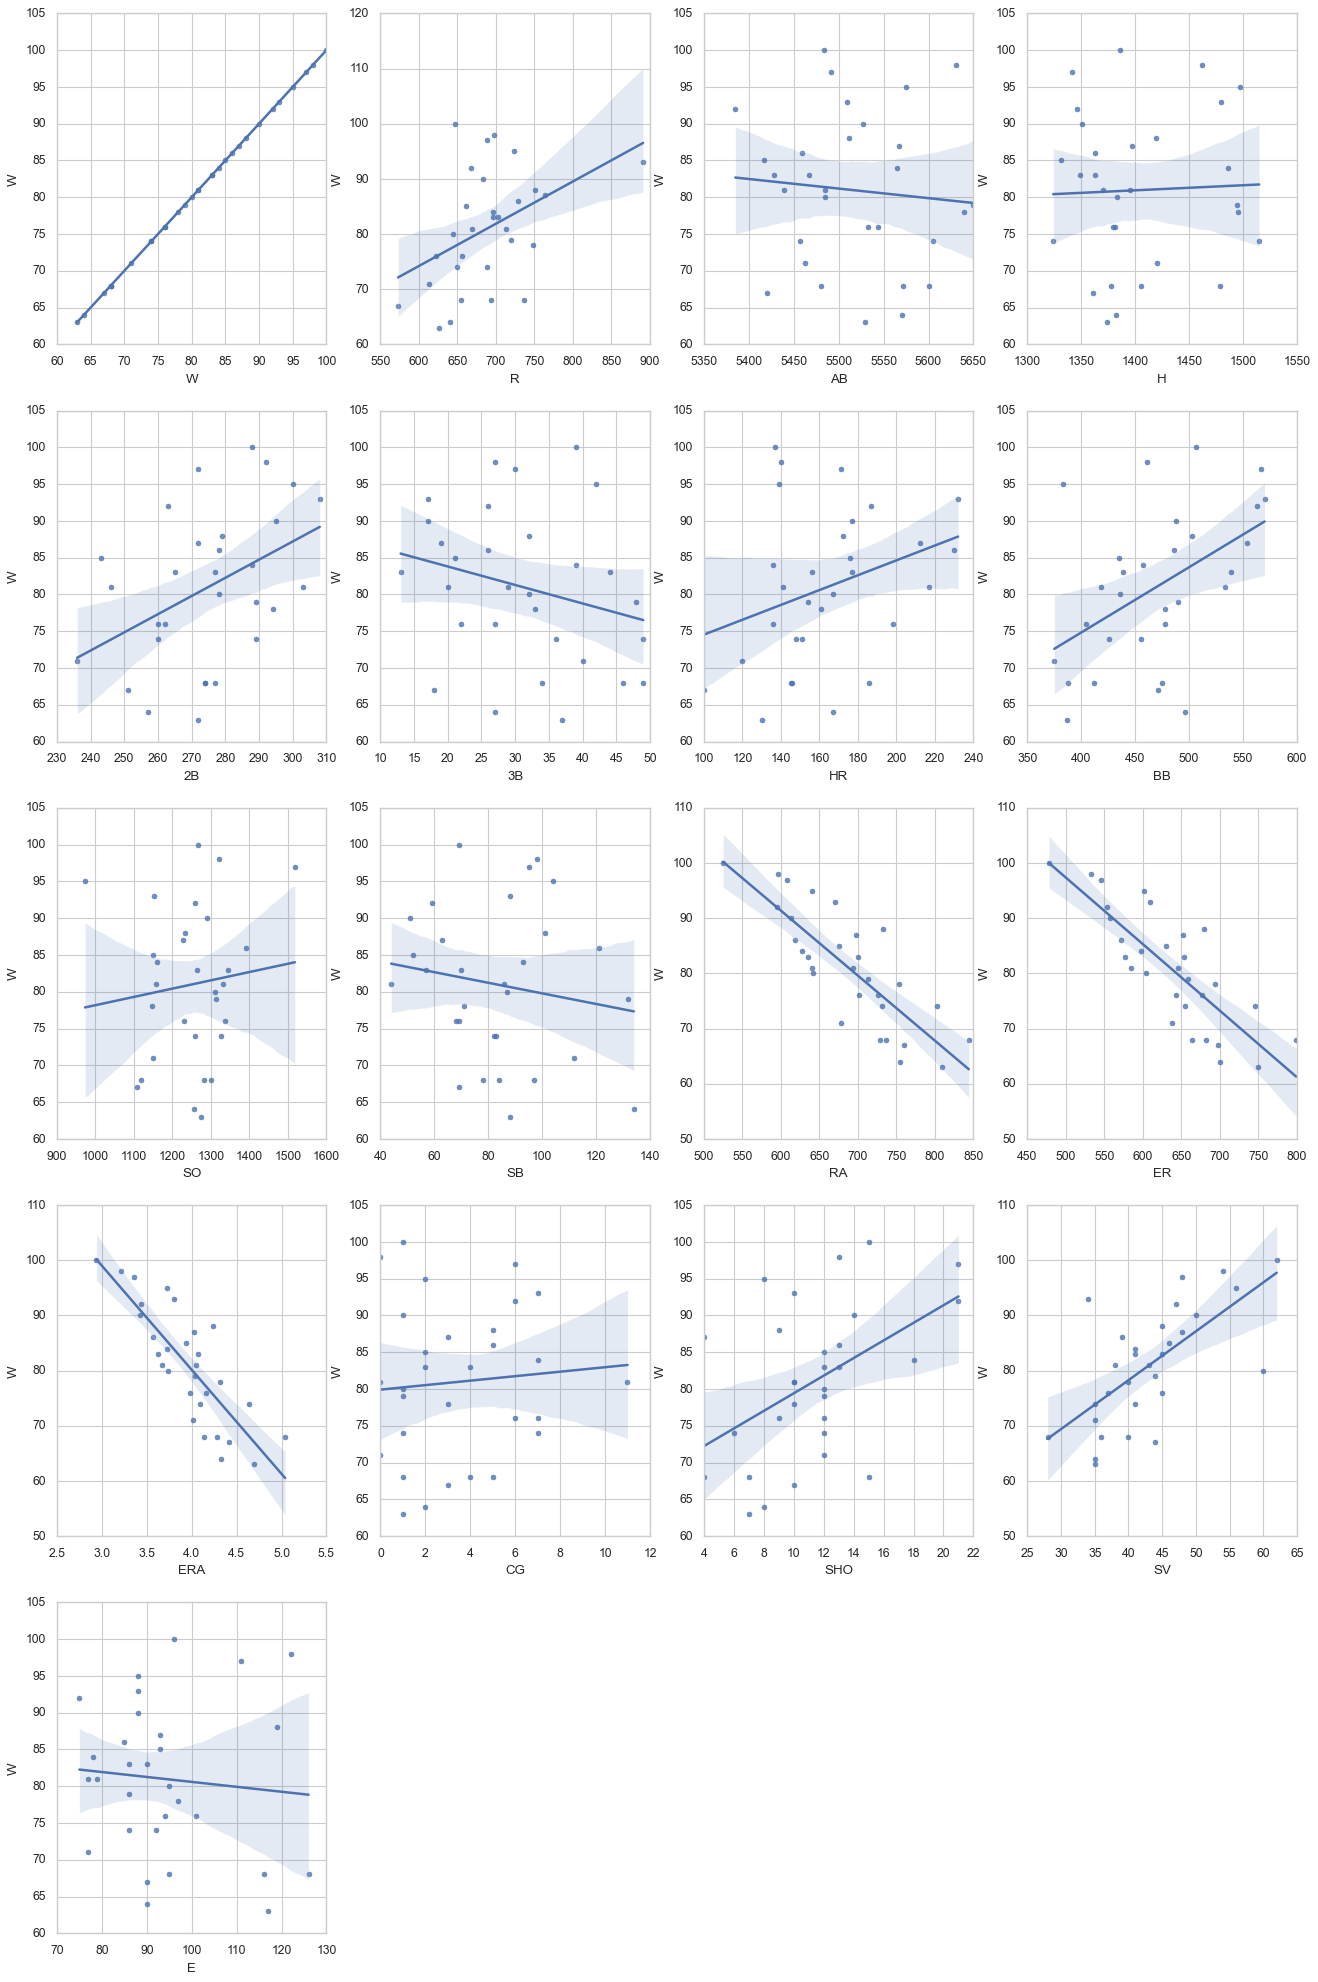

In [11]:
plt.figure(figsize= (20,30))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in df.columns:   # for-loop to iterate over every attribute whose outliers is to be visualized
    plt.subplot(5, 4, pos)   # plot grid
    sns.regplot(x=df[feature],y='W',data=df )  #plotting regplot  
    pos += 1  # to plot over the grid one by one 

- Run and win are linearly correlated
- At balls is weakly related to wins
- Hits are also very weekly related to wins
- Doubles are linearly related with wins
- Triple has very week negative correlation with win
- Home run has very low correlation with win
- Walk is lightly correlated with win
- Strike is not correlated to win
- Stolen bases is not correlated to win
- Runs allowed is highly correlate to win
- Earned run is highly correlated to win
- Earned run average is highly correlated to win
- Complete games are not correlated to win
- Shoutouts are correlated to win
- Saves are lightly correlated to win
- Errors are not correlated to win

#### Analysis from the visualization plots

- Runs, doubles, Home runs, walks, shoutouts, saves are highly positively linearly correlated
- Triples, runs allowed, Earned runs, Earned runs average are highly negatively linearly correlated
- The remaining features have less to no linear correlation with number of wins

#### Outliers

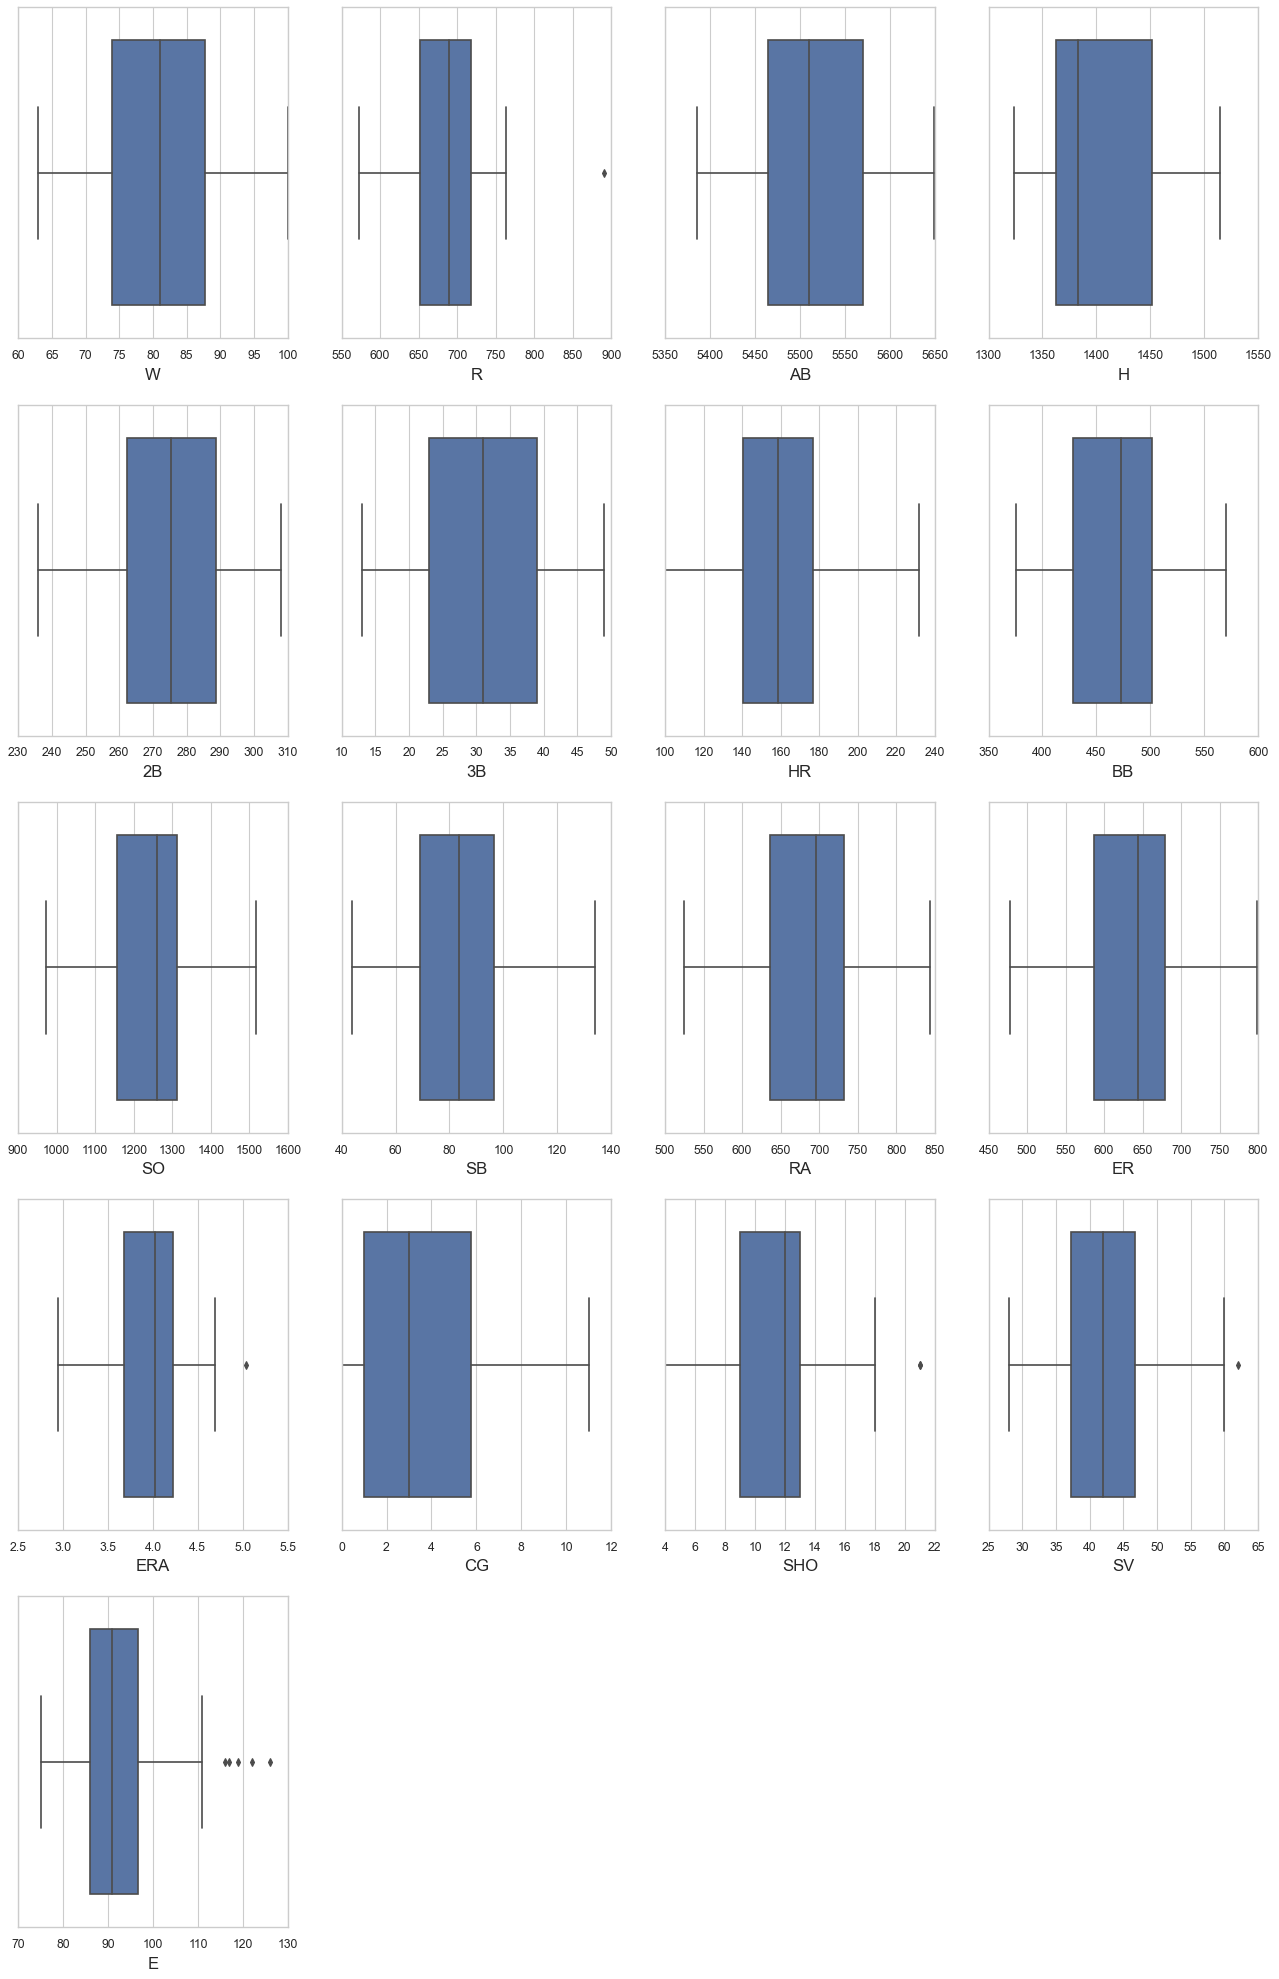

In [12]:
# Boxplots of all the columns
plt.figure(figsize=(20,30))
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

- 'W','AB','H','2B','3B,'HR','BB','SO','SB','RA','ER' and 'CG' has no outliers
- 'R' has outliers present between 850 and 900
- 'ERA' has outlier present just above 5.0
- 'SHO' has outlier between 20 and 22
- 'SV' has outlier between 60 and 65
- 'E' has outliers above maximum fence between 110 and 130

There are two methods to remove outliers. 
1. Z-score
2. IQR method
-  We are using IQR method to remove outliers here

In [13]:
def drop_outliers(df,col_name):
    iqr=1.5+(np.percentile(df[col_name],75)-np.percentile(df[col_name],25))
    df.drop(df[df[col_name]>(iqr+np.percentile(df[col_name],75))].index,inplace=True)
    df.drop(df[df[col_name]<(np.percentile(df[col_name],25)-iqr)].index,inplace=True)

In [14]:
drop_outliers(df,'R')

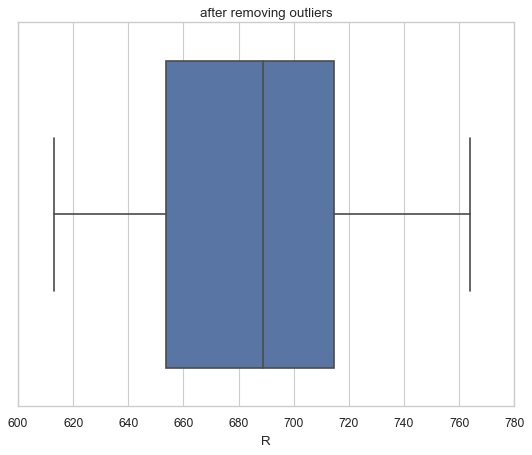

In [15]:
sns.boxplot(df['R'])
plt.title('after removing outliers')
plt.show()

- Outliers are removed from the Runs

In [16]:
drop_outliers(df,'SHO')

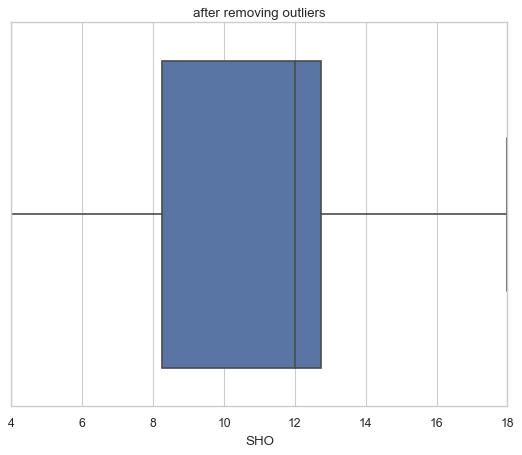

In [17]:
sns.boxplot(df['SHO'])
plt.title('after removing outliers')
plt.show()

- Outliers are removed in the shoutouts

In [18]:
drop_outliers(df,'SV')

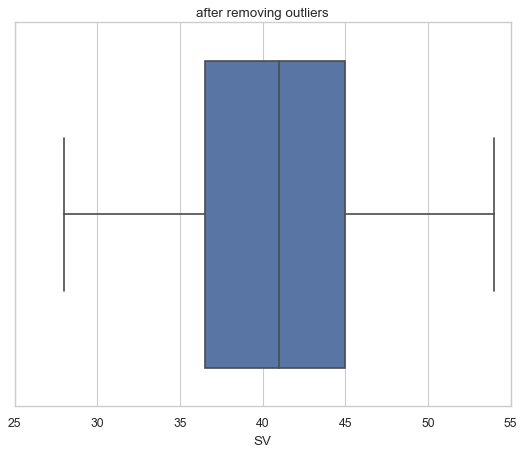

In [19]:
sns.boxplot(df['SV'])
plt.title('after removing outliers')
plt.show()

- Outliers are r4emoved in the Saves

In [20]:
drop_outliers(df,'E')

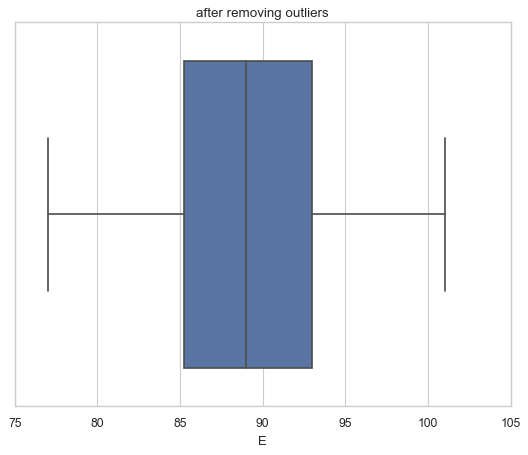

In [21]:
sns.boxplot(df['E'])
plt.title('after removing outliers')
plt.show()

- Outliers are removed in the Errors

In [22]:
#Creating copy of original dataset
df1=df.copy()

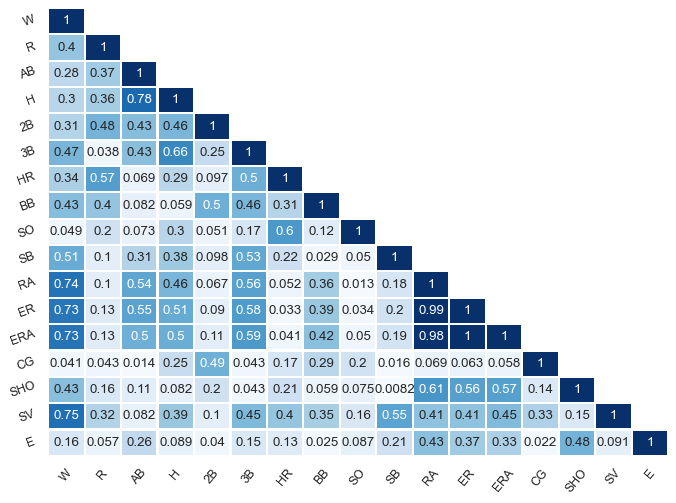

In [23]:
# Correlation among the attributes

corr = abs(df1.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = 0)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (10,7))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

- From the above correlation map 'RA',ER','ERA','SV' are highly correlated with win

In [24]:
df1=df.copy()

#### Separating target variable from the dataframe

In [83]:
x= df.drop(['W'],axis=1)   
y =df['W'] 


#### Standardize the continuous attributes

#### Pre-Processing

- The data in the data set have continous variables, so the preprocessing must be done. Preprocessing steps include standardization(transformation) and normalization(scaling).
- Standardisation is the method to convert data set into normal distribution.
      There are many methods for standardisation like log,square root,cube root,reciprocal,box-cox,power transformations
- Normalization scales the data into some range, minimizes the difference between low value and high value which helps in better prediction
      The methods for normalization are min-max scaler,mean normalization,standard scaling 

- Using standard scaling
      

In [26]:
scalar=StandardScaler()

In [27]:
x_scaled=scalar.fit_transform(x)

##### Checking for multicollinearity using VIF

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i)
           for i in range(len(x.columns))]
print(vif)

   feature           VIF
0        R    107.029708
1       AB    322.801588
2        H     62.135603
3       2B     43.004259
4       3B    223.007397
5       HR    106.454417
6       BB     76.591056
7       SO      6.732111
8       SB     31.470706
9       RA    432.707690
10      ER  24613.229410
11     ERA  18432.811180
12      CG     12.321338
13     SHO      9.740930
14      SV     16.740087
15       E     12.084975


- Here we can find that ER,ERA have high values of VIF indicating these two variables are highly correlated. Hence considering these two features together leads to a model with high multicollinearity.
- As there is multicollinearity problem, we use Principal Component analysis(PCA) to avoid multicollinearity problem

In [29]:
from sklearn.decomposition import PCA
pca=PCA()
X=pca.fit_transform(x)
pca.get_covariance()

array([[ 1.84280065e+03,  1.15207190e+03,  9.57908497e+02,
         3.94542484e+02,  1.92189542e+01,  7.46924837e+02,
         8.73565359e+02,  6.73767974e+02, -1.18911765e+02,
         2.78732026e+02,  3.44519608e+02,  2.11663399e+00,
        -5.54901961e+00, -2.42973856e+01,  6.28071895e+01,
         1.73627451e+01],
       [ 1.15207190e+03,  5.24484967e+03,  3.50499346e+03,
         6.07143791e+02,  3.61437908e+02, -1.51209150e+02,
         3.03895425e+02, -4.09934641e+02,  6.15705882e+02,
         2.44958170e+03,  2.45745098e+03,  1.39291503e+01,
         2.96078431e+00, -2.91241830e+01, -2.73267974e+01,
         1.34725490e+02],
       [ 9.57908497e+02,  3.50499346e+03,  3.83269281e+03,
         5.52405229e+02,  4.72993464e+02, -5.44888889e+02,
        -1.85856209e+02, -1.42986928e+03,  6.42764706e+02,
         1.81186928e+03,  1.95449020e+03,  1.20671242e+01,
         4.55098039e+01,  1.78692810e+01, -1.12006536e+02,
        -3.89019608e+01],
       [ 3.94542484e+02,  6.07143791e

In [30]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([4.34366095e-01, 2.30192484e-01, 1.70916114e-01, 6.26719510e-02,
       4.27172243e-02, 2.93491880e-02, 1.53621697e-02, 8.80075270e-03,
       3.38045365e-03, 1.17811202e-03, 5.86319763e-04, 2.47305121e-04,
       1.25491090e-04, 8.99405129e-05, 1.63987800e-05, 2.75379638e-10])

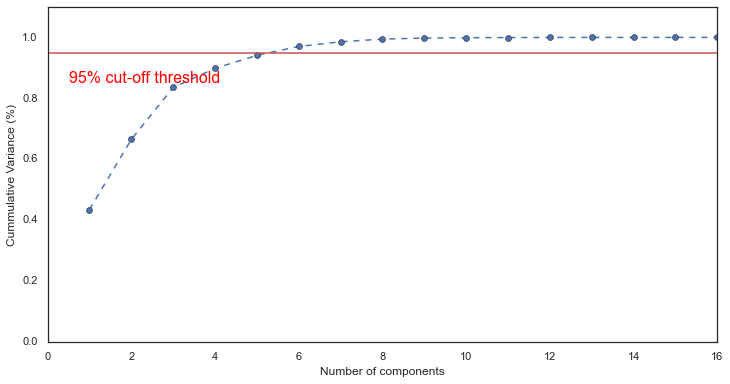

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(12,6)

fig,ax=plt.subplots()
xi=np.arange(1,17,step=1)
y=np.cumsum(explained_variance)


plt.ylim(0.0,1.1)
plt.plot(xi,y,marker='o',linestyle='--',color='b')

plt.xlabel('Number of components')
plt.ylabel('Cummulative Variance (%)')
plt.axhline(y=0.95,color='r',linestyle='-')
plt.text(0.5,0.85,'95% cut-off threshold',color='red',fontsize=16)

plt.show()

- Now looking at above plot, we are considering first 5 principal components only.

#### Split the data into test and train sets
###### Building the models without using principal components and checking the accuracy

In [99]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=8,test_size=0.25) # Split data into test and train

### Building models

#### Linear Regression

In [72]:
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [73]:
y_pred = lr.predict(x_test)

# Scores:
print("Performance on training data using LR:",lr.score(x_train,y_train)*100,'%')
print('Performance on testing data using LR:',lr.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))


Performance on training data using LR: 100.0 %
Performance on testing data using LR: 58.873373068735205 %
R2 Score: 0.588733730687352
MSE: 14.081757061265066
RMSE:  3.752566729755124


#### Ridge Regression

In [34]:
ri= Ridge()
ri.fit(x_train, y_train)

Ridge()

In [35]:
y_pred = ri.predict(x_test)

# Scores:
print("Performance on training data using RI:",ri.score(x_train,y_train)*100,'%')
print('Performance on testing data using RI:',ri.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Performance on training data using RI: 99.99758830718409 %
Performance on testing data using RI: 58.825344347048805 %
R2 Score: 0.588253443470488
MSE: 14.098202095570489
RMSE:  3.7547572618706644


#### Lasso regression

In [36]:
la= Lasso()
la.fit(x_train, y_train)

Lasso()

In [37]:
y_pred = la.predict(x_test)

# Scores:
print("Performance on training data using LA:",la.score(x_train,y_train)*100,'%')
print('Performance on testing data using LA:',la.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Performance on training data using LA: 98.91362320876223 %
Performance on testing data using LA: 64.51290848552871 %
R2 Score: 0.6451290848552871
MSE: 12.150780134554969
RMSE:  3.485796915277046


#### Support Vector Regressor

In [38]:
svr=SVR(kernel='linear')
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [39]:
y_pred = svr.predict(x_test)
print('Performance on training data using SVR:',svr.score(x_train,y_train)*100,'%')
print('Performance on testing data using SVR:',svr.score(x_test,y_test)*100,'%')
#Evaluate the model using r2 score
print('R Square SVR: ',r2_score(y_test, y_pred))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 99.97612260259004 %
Performance on testing data using SVR: 57.88417133574705 %
R Square SVR:  0.5788417133574705
MSE:  14.42045973464021


#### K Neigbor Regressor

In [40]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [41]:
y_pred = knn.predict(x_test)

# Scores:
print("Performance on training data using KNN:",knn.score(x_train,y_train)*100,'%')
print('Performance on testing data using KNN:',knn.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Performance on training data using KNN: 46.47961765532752 %
Performance on testing data using KNN: -45.46728971962626 %
R2 Score: -0.4546728971962626
MSE: 49.80800000000003
RMSE:  7.057478303190172


#### Decision Tree

In [42]:
dt = DecisionTreeRegressor()
dt.fit(x_train , y_train)

DecisionTreeRegressor()

In [43]:
y_pred = dt.predict(x_test)
# performance on train data
print('Performance on training data using DT:',dt.score(x_train,y_train)*100,'%')
# performance on test data
print('Performance on testing data using DT:',dt.score(x_test,y_test)*100,'%')
#  Evaluate the model using r2 score
acc_DT=metrics.r2_score(y_test, y_pred)
print('R Square DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 100.0 %
Performance on testing data using DT: -126.63551401869162 %
R Square DT:  -1.2663551401869162
MSE:  77.6


#### Random Forest Regressor

In [44]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [45]:
y_pred = rf.predict(x_test)
print('Performance on training data using RF:',rf.score(x_train,y_train)*100,'%')
print('Performance on testing data using RF:',rf.score(x_test,y_test)*100,'%')
#Evaluate the model using r2 score
acc_RFR=metrics.r2_score(y_test, y_pred)
print('R Square RF: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RF: 88.97658841720553 %
Performance on testing data using RF: -134.80654205607485 %
R Square RF:  -1.3480654205607485
MSE:  80.39776000000003


##### - Now the algorithms with better accuracy score are linear regression,ridge ,lasso and svr
- Now we should do Hyperparameter tuning for ridge regression

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=42)
grid=dict()
grid['alpha']=arange(0,1,0.01)
search=GridSearchCV(Ridge(),grid,cv=cv,n_jobs=-1)
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=42),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])})

In [62]:
y_pred = search.predict(x_test)

# Scores:
print("Performance on training data after tuning RI:",search.score(x_train,y_train)*100,'%')
print('Performance on testing data after tuning RI:',search.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Performance on training data after tuning RI: 100.0 %
Performance on testing data after tuning RI: 58.87337306865199 %
R2 Score: 0.5887337306865199
MSE: 14.081757061293555
RMSE:  3.75256672975892


- When performed hyperparameter tuning on ridge regression model, the accuracy of the model didnt increase.

### Multiple model Ensemble

In [65]:

# Import support vector regressor machine learning library
from sklearn.svm import SVR
LR=LinearRegression()
RI=Ridge()
LA=Lasso()
SVR=SVR(kernel='linear')

In [66]:
evc=VotingRegressor(estimators=[('LR',LR),('RI',RI),("LA",LA),('SVR',SVR)])
evc.fit(x_train, y_train)

VotingRegressor(estimators=[('LR', LinearRegression()), ('RI', Ridge()),
                            ('LA', Lasso()), ('SVR', SVR(kernel='linear'))])

In [67]:
y_pred = evc.predict(x_test)
# performance on train data
print('Performance on training data using ensemble:',evc.score(x_train,y_train)*100,'%')
# performance on test data
print('Performance on testing data using ensemble:',evc.score(x_test,y_test)*100,'%')
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 99.90721576504585 %
Performance on testing data using ensemble: 72.22653885167772 %
Accuracy ensemble:  0.7222653885167771
MSE:  9.509633097185553


###### Building the models by using first 5 principal components and checking the accuracy

In [94]:
pca=PCA(n_components=5)
pca.fit(X)
X1=pca.fit_transform(X)

In [95]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1,y, random_state=8,test_size=0.25) # Split data into test and train

#### Linear Regression

In [96]:
lrpca= LinearRegression()
lrpca.fit(x1_train, y1_train)

y1_pred = lrpca.predict(x1_test)

# Scores:
print("Performance on training data using LR:",lrpca.score(x1_train,y1_train)*100,'%')
print('Performance on testing data using LR:',lrpca.score(x1_test, y1_test)*100,'%')
print('R2 Score:',r2_score(y1_test, y1_pred))
print('MSE:',mean_squared_error(y1_test, y1_pred))
print("RMSE: ",mean_squared_error(y1_test, y1_pred, squared=False))

Performance on training data using LR: 75.94374927840346 %
Performance on testing data using LR: 68.92659225505945 %
R2 Score: 0.6892659225505945
MSE: 10.639534811867644
RMSE:  3.261829978994559


#### Ridge Regression

In [97]:
ripca= Ridge()
ripca.fit(x1_train, y1_train)

y1_pred = ripca.predict(x1_test)

# Scores:
print("Performance on training data using LR:",ripca.score(x1_train,y1_train)*100,'%')
print('Performance on testing data using LR:',ripca.score(x1_test, y1_test)*100,'%')
print('R2 Score:',r2_score(y1_test, y1_pred))
print('MSE:',mean_squared_error(y1_test, y1_pred))
print("RMSE: ",mean_squared_error(y1_test, y1_pred, squared=False))

Performance on training data using LR: 75.94374918073875 %
Performance on testing data using LR: 68.92513412236396 %
R2 Score: 0.6892513412236395
MSE: 10.640034076502582
RMSE:  3.261906509466907


#### Lasso Regression

In [98]:
lapca= Lasso()
lapca.fit(x1_train, y1_train)

y1_pred = lapca.predict(x1_test)

# Scores:
print("Performance on training data using LA:",lapca.score(x1_train,y1_train)*100,'%')
print('Performance on testing data using LA:',lapca.score(x1_test, y1_test)*100,'%')
print('R2 Score:',r2_score(y1_test, y1_pred))
print('MSE:',mean_squared_error(y1_test, y1_pred))
print("RMSE: ",mean_squared_error(y1_test, y1_pred, squared=False))

Performance on training data using LA: 75.93622462668377 %
Performance on testing data using LA: 68.31932938088056 %
R2 Score: 0.6831932938088057
MSE: 10.847461619986495
RMSE:  3.293548484535562


### Compare performances of all the models

In [91]:
summary = pd.DataFrame({'Model' : ['Linear Regression','Lasso Regression','Ridge Regression','SVR','Kneigbor','Decision Tree',
                                   'Random Forest','Ridge after hyperparameter tuning',
                                   'Ensemble(LR+LA+RI+SVR)','Linear PCA','Ridge PCA','Lasso PCA'],
                      'R Square': [0.588,0.645,0.588,0.578,-0.454,-1.266,-1.348,0.588,0.722,0.689,0.689,0.683],
                      'Mean Square Error' : [14.08,12.15,14.09,14.42,49.80,77.6,80.3,14.08,9.50,10.6,10.64,10.84]})
summary

,Model,R Square,Mean Square Error
0,Linear Regression,0.588,14.08
1,Lasso Regression,0.645,12.15
2,Ridge Regression,0.588,14.09
3,SVR,0.578,14.42
4,Kneigbor,-0.454,49.80
5,Decision Tree,-1.266,77.60
6,Random Forest,-1.348,80.30
7,Ridge after hyperparameter tuning,0.588,14.08
8,Ensemble(LR+LA+RI+SVR),0.722,9.50
9,Linear PCA,0.689,10.60


- Ensemble model (Linear Regression, Lasso Regression, Ridge regression, SVR) is performing well on this data with testing accuracy of 72%
- Kneighbor, Decision tree, Random forest models doesn't fit for this data
- When tuned the ridge regression model with parameters, the accuracy of the model didnot increase.
- PCA is used when data is huge. But to verify if accuracy increases, we used PCA and found the principal components as 5 and build the models using principal components.
- When build the models using PCA, training score has reduced but testing score has improved to 68%.
- After whole analysis, we conclude ensemble model is the best performing model for this data

#### Saving the model

In [92]:

import pickle
filename = 'Baseball.pkl'
pickle.dump(evc, open(filename, 'wb'))

#### Conclusion

In [100]:
loaded_model=pickle.load(open('Baseball.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

72.22653885167772
